In [6]:
import scipy
import pandas as pd
import numpy as np
from scipy import constants
from scipy.interpolate import UnivariateSpline
from numpy import exp
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy.integrate import odeint

In [7]:
df1=pd.read_csv('global.1751_2014.csv')
df1

,Year,total,Carbon emissions from gas fuel consumption,Carbon emissions from liquid fuel consumption,Carbon emissions from solid fuel consumption,Carbon emissions from cement production,Carbon emissions from gas flaring,Per capita carbon emissions (metric tons of carbon; after 1949 only)
0,1751,3,0,0,3,0,0,NaN
1,1752,3,0,0,3,0,0,NaN
2,1753,3,0,0,3,0,0,NaN
3,1754,3,0,0,3,0,0,NaN
4,1755,3,0,0,3,0,0,NaN
...,...,...,...,...,...,...,...,...
259,2010,9128,1696,3107,3812,446,67,1.32
260,2011,9503,1756,3134,4055,494,64,1.36
261,2012,9673,1783,3200,4106,519,65,1.36
262,2013,9773,1806,3220,4126,554,68,1.36


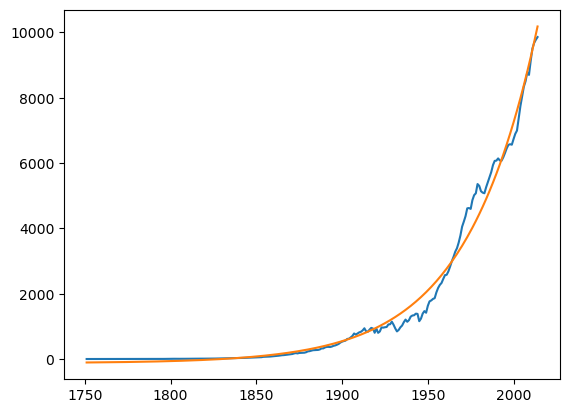

[ 2.39596800e-02 -3.90147674e+01 -1.22229282e+02]


In [8]:
#这道题求助了赵望超
import scipy.optimize as optimize
# 对其进行指数拟合y=exp(a1*x+a2)+a3，得到化石燃料排放的二氧化碳随时间变化的曲线
def fossil_emiss(x,a1,a2,a3): # 定义拟合的函数
    return np.exp(a1*x+a2)+a3
# 设置拟合的初始值
a1=0.1
a2=0.1
a3=0
p0=[a1,a2,a3]
#这里编辑了原文件，原表名太长了
df1['Year'] = df1['Year'].astype(float)
df1['total'] = df1['total'].astype(float)
# 调用拟合函数
para,cov=optimize.curve_fit(fossil_emiss,df1['Year'],df1['total'],p0=p0)

# 计算拟合后的结果
y_fit=[fossil_emiss(a,*para) for a in df1['Year']]

# 画真实值和拟合后的图
plt.plot(df1['Year'],df1['total'])
plt.plot(df1['Year'],y_fit)

plt.show()
print(para)

In [9]:
# 定义没有buffer效应的碳循环函数
def model1(y,t,k12,k21):
    N1,N2,a = y#a是γ
    dydt=[-k12*N1+k21*N2+a,k12*N1-k21*N2, 2.39596800e-02*a+2.39596800e-02*1.22229282e+02]
    return dydt

In [12]:
# 设置初始值
t1=np.linspace(1987, 2005) 
a=fossil_emiss(t,*para)
k12=105/740
k21=102/900
N1=740*1000
N2=900*1000
y0=[N1,N2,a[0]] 
#转化单位
sol = odeint(model1, y0, t, args=(k12,k21))/1000/740*347 

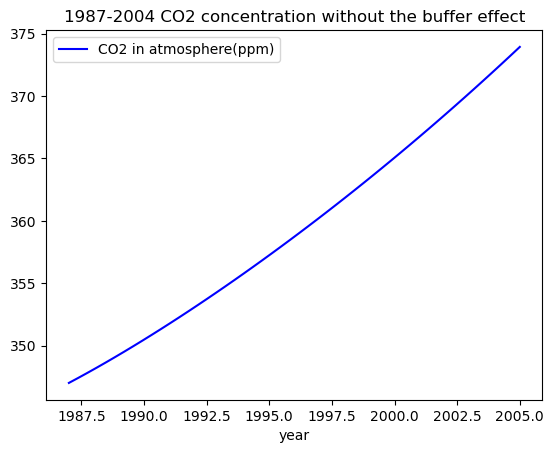

In [13]:
# 画图
from matplotlib.ticker import MaxNLocator
plt.plot(t1, sol[:, 0], 'b', label='CO2 in atmosphere(ppm)')
plt.legend(loc='best')
plt.xlabel('year')
# 设置横坐标轴刻度为整数
#plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('1987-2004 CO2 concentration without the buffer effect')
plt.show()

In [14]:
# 定义有buffer效应的函数
def model2(y,t,k12,k21,N0):
    N1,N2,a2 = y
    bf=3.69+1.86e-2*(N1/740/1000*347)-1.8e-6*((N1/740/1000*347)**2) #buffer factor
    dydt=[-k12*N1+k21*(N0+bf*(N2-N0))+a2,
          k12*N1-k21*(N0+bf*(N2-N0)),
          2.39596800e-02*a2+2.39596800e-02*1.22229282e+02]
    return dydt

In [15]:
# 设置初始值
t2=np.linspace(0, 253, 253)+1751 
a2=fossil_emiss(t2,*para)

k12=105/740
k21=102/900
N0=821*1000
N1=618*1000
N2=821*1000
y0=[N1,N2,a2[0]] 
sol2 = odeint(model2, y0, t2, args=(k12,k21,N0))/740/1000*347 #计算微分方程，并且转化为ppm的单位

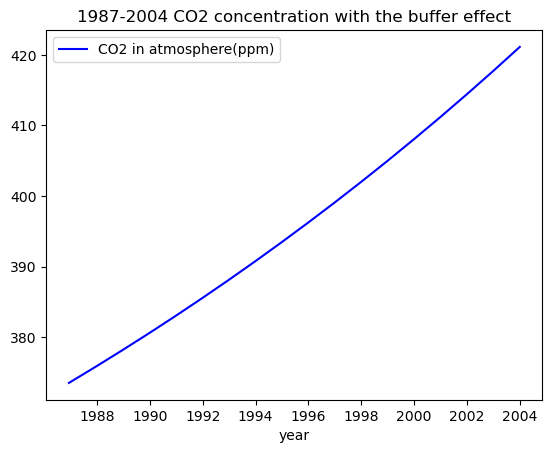

In [16]:
# 画图
plt.plot(t2[235:253], sol2[235:253,0], 'b', label='CO2 in atmosphere(ppm)')
plt.legend(loc='best')
plt.xlabel('year')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('1987-2004 CO2 concentration with the buffer effect')
plt.show()

In [17]:
# 导入观测值数据
df2=pd.read_csv('co2_annmean_mlo.csv')
df2

,year,mean,unc
0,1959,315.98,0.12
1,1960,316.91,0.12
2,1961,317.64,0.12
3,1962,318.45,0.12
4,1963,318.99,0.12
...,...,...,...
59,2018,408.72,0.12
60,2019,411.65,0.12
61,2020,414.21,0.12
62,2021,416.41,0.12


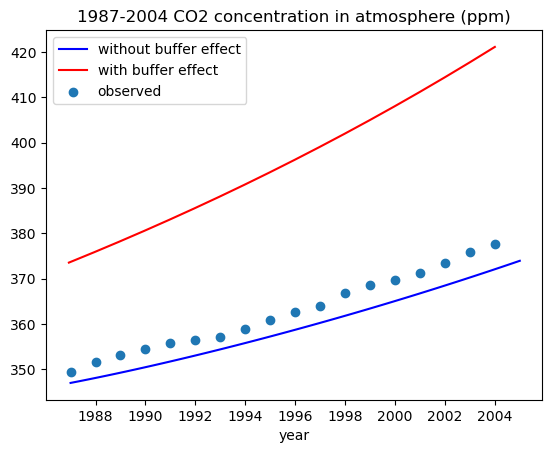

In [18]:
# 画图
plt.plot(t, sol[:, 0], 'b') # without buffer effect
plt.plot(t2[235:253], sol2[235:253,0], 'r') # with buffer effect
plt.scatter(df2['year'][28:46],df2['mean'][28:46]) # observed data

plt.legend(['without buffer effect','with buffer effect','observed'],loc='best')
plt.xlabel('year')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True)) # 设置横坐标轴刻度为整数
plt.title('1987-2004 CO2 concentration in atmosphere (ppm)')
plt.show()
# 不考虑buffer效应时比观测值低估，可能是由于人为源排放拟合时有一定的低估，因此积分之后会出现比观测值低